In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [125]:
df = pd.read_csv('raises.csv')

# Exploring data

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4669 entries, 0 to 4668
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4669 non-null   object 
 1   Timestamp        4669 non-null   int64  
 2   Date             4669 non-null   object 
 3   Amount Raised    4545 non-null   float64
 4   Round            4088 non-null   object 
 5   Description      4426 non-null   object 
 6   Lead Investor    1898 non-null   object 
 7   Category         2684 non-null   object 
 8   Source           1740 non-null   object 
 9   Valuation        189 non-null    object 
 10  Chains           835 non-null    object 
 11  Other Investors  2446 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 437.8+ KB


In [127]:
df['Valuation'].describe()

count     189
unique     97
top       100
freq       13
Name: Valuation, dtype: object

Looking at the caluation column, we can see that it has too many missing values and thus we can use it 

# Cleaning data

In [128]:
df.drop(['Source', 'Timestamp'], axis=1, inplace=True)

In [129]:
df['Amount Raised'].dtype

dtype('float64')

In [130]:
df['Amount Raised'] = df['Amount Raised'] / 1000000

In [131]:
data = df.copy()

In [132]:
data

,Name,Date,Amount Raised,Round,Description,Lead Investor,Category,Valuation,Chains,Other Investors
0,Llama,2023-11-06,6.000,Seed,Access control and governance platform for sma...,Founders Fund + Electric Capital,DAO infrastructure,NaN,NaN,Stani Kulechov + Viktor Bunin + Elad Gil + San...
1,Intmax,2023-11-03,NaN,Strategic,stateless zkRollup,NaN,L2,NaN,Ethereum,LD Capital + GMO AI & Web3 + Kx Technology Fun...
2,Layer N,2023-11-03,NaN,Strategic,rollup network designed to scale financial app...,BlackPine,L2,NaN,Ethereum,NaN
3,Toposware,2023-11-02,5.000,Seed+,Zero knowledge infrastructure,Evolution Equity Partners,Infrastructure,NaN,NaN,Triatomic Capital + K2 Access Fund + Sandeep N...
4,Trips,2023-11-02,2.500,Pre-Seed,"IP Protection, Authentication and Monetization...",NaN,NaN,NaN,NaN,Shima Capital + Animal Capital + Blackwood Ven...
...,...,...,...,...,...,...,...,...,...,...
4664,Xapo,2014-07-08,20.000,Series A,Xapo combines the convenience of an everyday b...,NaN,Infrastructure,NaN,NaN,Blockchain Capital + David Marcus + Emergence ...
4665,Axoni,2014-06-25,2.770,NaN,"Axoni offers blockchain infrastructure, distri...",NaN,Infrastructure,NaN,NaN,NaN
4666,BitGo,2014-06-16,12.000,Series A,BitGo is an institutional digital asset financ...,NaN,CeFi,NaN,NaN,A-Grade Investments + Ben Davenport + Bill Lee...
4667,BitFlyer,2014-06-10,1.172,Seed,BitFlyer is a bitcoin exchange and marketplace...,NaN,Centralized Exchange,NaN,NaN,B Dash Ventures + East Ventures + Incubate Fund


# Creating new columns (year, months)

In [133]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [134]:
pd.DataFrame(data.groupby(['Year'])['Amount Raised'].sum())

,Amount Raised
Year,
2014,246.0370
2015,483.9800
2016,1055.4510
2017,6299.1080
2018,16241.6250
2019,4568.6500
2020,4395.4600
2021,36362.2450
2022,22124.1419


# Raised by month and year
To see if there are any paterns in investment seasonality

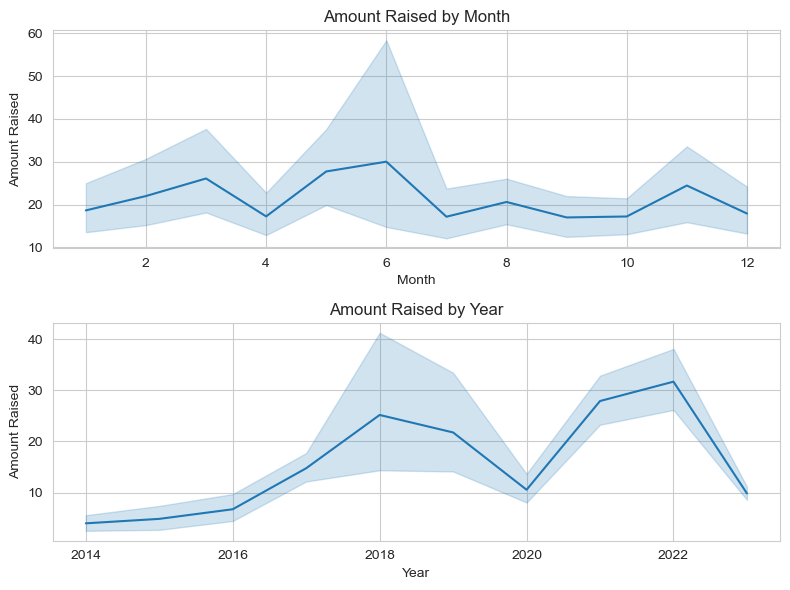

In [243]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
for index, _ in enumerate(['Month', 'Year']):
    
    sns.lineplot(x=_,
                    y='Amount Raised',
                    data=data,
                    ax=axes[index]
                    )
    axes[index].set_title(f'Amount Raised by {_}')
    axes[index].set_xlabel(_)

plt.tight_layout()
plt.show()

# Funding by rounds

In [138]:
df['Round'].unique()

array(['Seed', 'Strategic ', 'Seed+', 'Pre-Seed', nan, 'Private',
       'Series A', 'pre-Series A ', 'Series A+', 'Public token sale',
       'Series B', 'Equity + Token', 'Token Pre-Sale', 'Angel Round',
       'pre-Series A', 'Seed and Strategic', 'Strategic Round',
       'Venture Round', 'Series C', 'Private token sale', 'Private Round',
       'Series C+', 'Presale', 'Private + Public', 'Pre-seed+',
       'Institutional', 'Series B1', 'SAFT', 'IFO', 'Preseed',
       'TwelveFold Auction', 'Series pre-A', 'IPO', 'Series A-4',
       'Series A2', 'Equity', 'Convertible note issuance', 'Bridge Round',
       'Strategic Private Sale', 'Private Equity', 'Ecosystem Round',
       'Ecosystem Foundation raise', 'Public Offering Common Stock',
       'Series A & B', 'DAO round', 'Treasury Diversification',
       '3rd round', 'Series D', 'Loan', 'Post-IPO Equity', 'Series F',
       'pre-Series B', 'IEO', 'ICO', 'Seed & Private', 'Grant',
       'Series C-1', 'Series E', 'Post-IPO Debt',

### Cleaning round column

In [139]:
df['Round'] = df['Round'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['Round'] = df['Round'].fillna('unknown')

df.loc[df['Round'].str.contains('seed'), 'Round'] = 'seed'
df.loc[df['Round'].str.contains('series'), 'Round'] = 'series'
df.loc[df['Round'].str.contains('public|ipo|ico|dyco|coinlist|crowdfunding'), 'Round'] = 'public round'
df.loc[df['Round'].str.contains('institutional|private|equity|venture|corporate|funding round'), 'Round'] = 'institutional'
df.loc[df['Round'].str.contains('3rd round|twelvefold auction|loan|ieo'), 'Round'] = 'unknown'

In [140]:
df['Round'].unique()

array(['seed', 'strategic ', 'unknown', 'institutional', 'series',
       'public round', 'token pre-sale', 'angel round', 'strategic round',
       'presale', 'saft', 'ifo', 'convertible note issuance',
       'bridge round', 'ecosystem round', 'ecosystem foundation raise',
       'dao round', 'treasury diversification', 'grant', 'debt financing',
       'secondary market'], dtype=object)

In [141]:
raised_round = df.groupby('Round')['Amount Raised'].agg(['count', 'sum']).sort_values(by='sum', ascending=False)

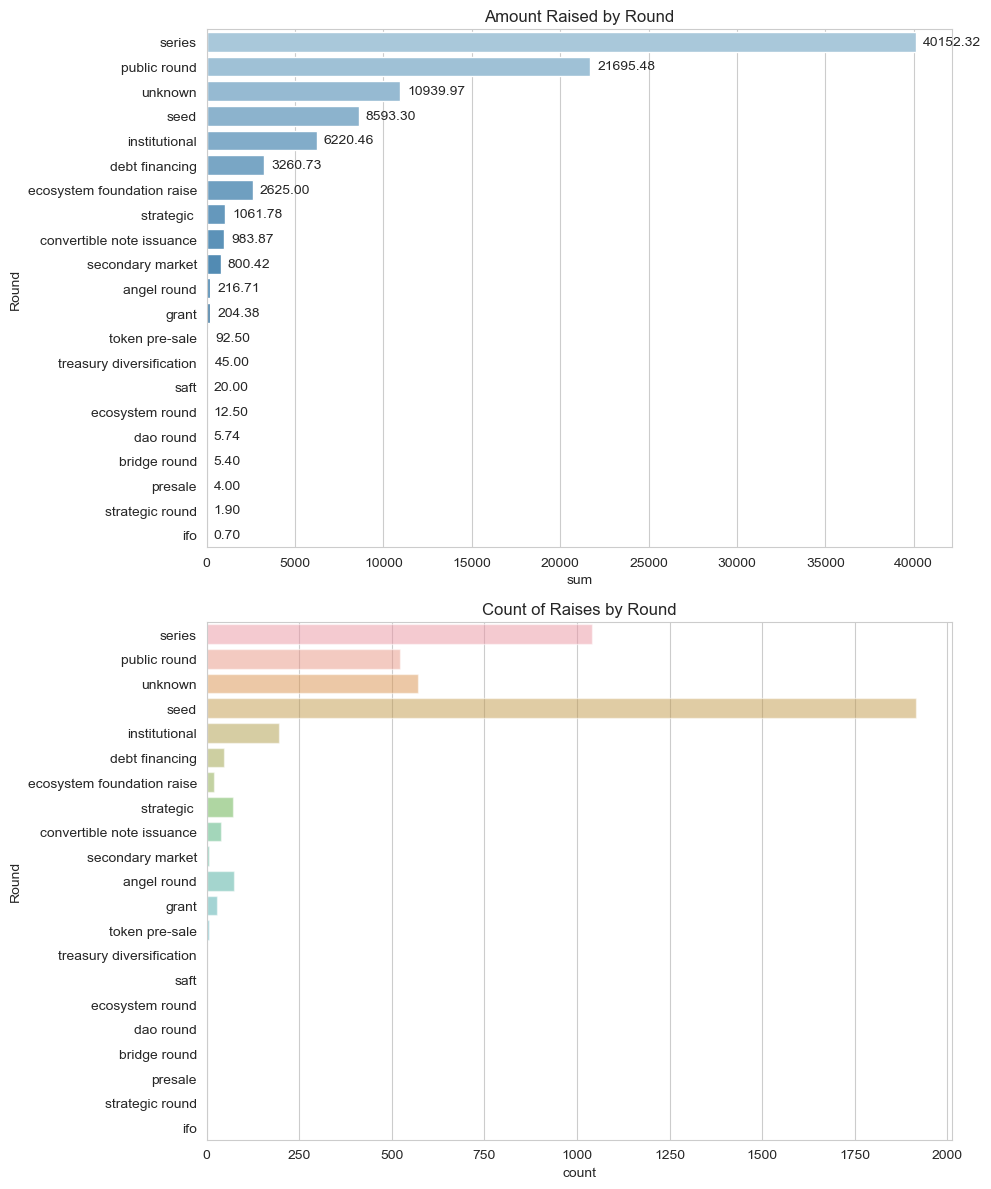

In [142]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Amount Raised by Round
sns.barplot(data=raised_round, 
            x='sum', 
            y=raised_round.index, 
            palette='Blues_d',
            ax=axes[0])
axes[0].set_title('Amount Raised by Round')

# Plot 2: Count of Raises by Round
sns.barplot(data=raised_round,
            x='count',
            y=raised_round.index,
            alpha=0.5,
            ax=axes[1])
axes[1].set_title('Count of Raises by Round')

# Annotate the Amount Raised values
for i, (index, row) in enumerate(raised_round.iterrows()):
    axes[0].annotate(f"{row['sum']:.2f}", 
                     xy=(row['sum'], i), 
                     xytext=(5, 0), 
                     textcoords="offset points", 
                     ha='left', 
                     va='center')

plt.tight_layout()
plt.show()


In [143]:
data = df.copy()

In [144]:
data['Other Investors'] = data['Other Investors'].fillna('None')

In [145]:
data['Other Investors'] = data['Other Investors'].apply(lambda x: x.lower() if isinstance(x, str) else x)
data['Other Investors'] = data['Other Investors'].str.replace(' ', '')

In [146]:
data['Other Investors'].str.split('+', expand=True).stack().value_counts().head(20)

none                   2223
coinbaseventures        182
dcg                     132
panteracapital           94
alamedaresearch          91
animocabrands            88
blockchaincapital        74
cmtdigital               71
fenbushicapital          71
hashed                   70
ngcventures              69
a16z                     68
thespartangroup          67
shimacapital             63
balajisrinivasan         63
au21capital              59
robotventures            56
coinfund                 56
multicoincapital         54
arringtonxrpcapital      54
Name: count, dtype: int64

In [147]:
investor = data.loc[data['Other Investors'] != 'none', 'Other Investors'].str.split('+', expand=True).stack().value_counts()
investor = pd.DataFrame(investor).reset_index()

In [148]:
investor.columns = ['Investor', 'Count']

### 30 most active investors

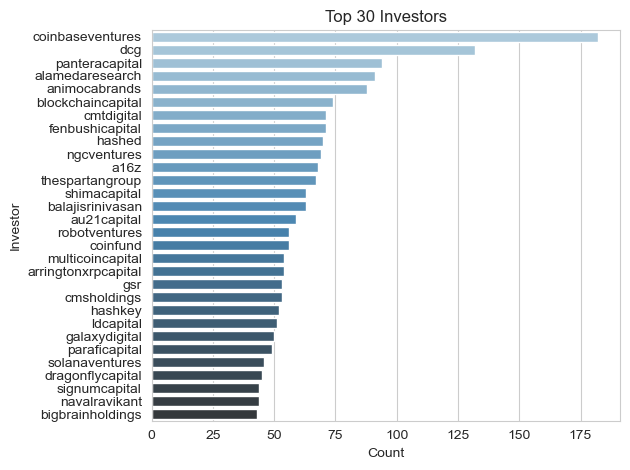

In [150]:
sns.barplot(data=investor.head(30),
            x='Count',
            y='Investor',
            palette='Blues_d')


plt.title('Top 30 Investors')
plt.tight_layout()
plt.show()

# Exploring amounts raised by category 

In [151]:
sector = df.groupby('Category', as_index=False)['Amount Raised'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).head(20)

In [152]:
sector

,Category,count,sum
27,L1,186,10787.1080
24,Infrastructure,462,10068.3370
6,CeFi,186,9476.3140
8,Centralized Exchange,137,6924.0800
15,DeFi,470,5194.0849
19,Gaming,183,3973.8160
32,Mining,69,3534.6050
33,NFT,200,2482.5440
46,Trading,115,1469.5520
1,Analytics,83,1051.8080


In [153]:
melted_df = sector.melt(id_vars='Category', var_name='Metric', value_name='Count')


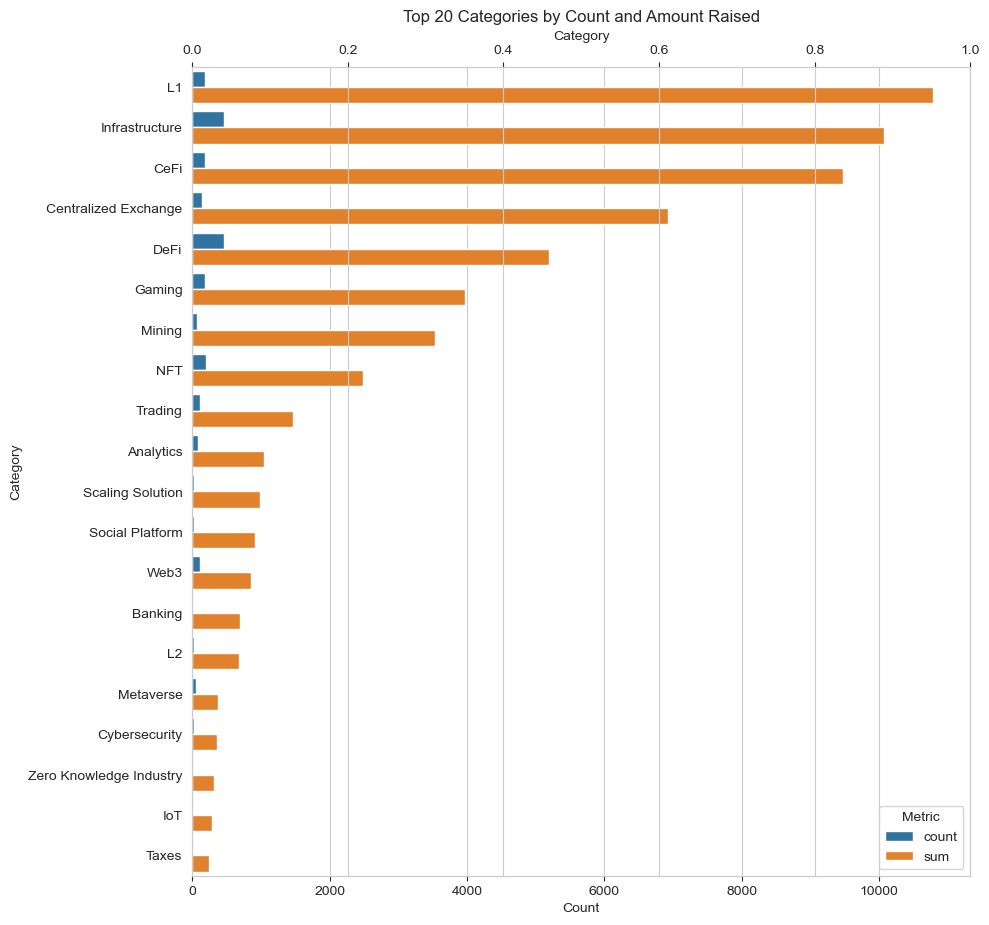

In [154]:
fig, axes = plt.subplots(figsize=(10, 9))

axes2 = axes.twiny()
sns.barplot(data=melted_df,
            x='Count',
            y='Category',
            hue='Metric',
            ax=axes,
            alpha=1,
            dodge=True)

plt.tight_layout()
plt.title('Top 20 Categories by Count and Amount Raised')
plt.xlabel('Category')
plt.ylabel('Count / Amount Raised')
plt.show()


# See how the investment amount were changing by category in each year

In [155]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [156]:
year_cat = data.groupby(['Year', 'Category'],
                         as_index=False)['Amount Raised'].sum().sort_values(by=['Year', 'Amount Raised'], 
                                                                            ascending=[True, False])

In [157]:
year_cat.head(20).sort_values(by=['Year', 'Amount Raised'], ascending=[True, False])

,Year,Category,Amount Raised
3,2014,Infrastructure,91.138
2,2014,Centralized Exchange,36.647
4,2014,L1,22.980
7,2014,Payments,18.000
5,2014,Mining,14.000
1,2014,CeFi,13.243
9,2014,Trading,10.902
6,2014,NFT,0.914
8,2014,Storage,0.582
0,2014,Analytics,0.100


In [158]:
import plotly.express as px

In [209]:
fig = px.bar(year_cat, 
             x='Amount Raised', 
             y='Category', 
             animation_frame='Year', 
             orientation='h',
             range_x=[0, year_cat['Amount Raised'].max() * 1.1],
             title='Annual Amount Raised by Category Over Years',
             color='Category')

fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  xaxis_title='Amount Raised (in Millions)',
                  yaxis_title='Category',
                  legend_title='Category',
                  template='plotly_white',
                  height=500,
                  width=1000)
fig.show()

In [160]:
top_20_cat = data.groupby('Category')['Amount Raised'].sum().sort_values(ascending=False).head(20).to_frame()

In [161]:
annual_category_totals = data.groupby(['Year', 'Category'])['Amount Raised'].sum().reset_index().sort_values(by=['Year', 'Amount Raised'], ascending=[True, False])
pivot_table = annual_category_totals.pivot(index='Year', columns='Category', values='Amount Raised').fillna(0)
pivot_table.head()

Category,AI,Analytics,Banking,Betting,Blockchain-as-a-Service,CEX,CeFi,CeFi Yield,Centralized Exchange,Cloud Security,...,Smart contract security,Social Platform,Storage,Supply Chain,Taxes,Trading,Travel,Voting,Web3,Zero Knowledge Industry
Year,,,,,,,,,,,,,,,,,,,,,
2014,0.0,0.10,0.0,0.0,0.0,0.0,13.243,0.0,36.647,0.0,...,0.00,0.00,0.582,0.00,0.0,10.902,0.0,0.0,0.00,0.0
2015,0.0,7.22,1.4,0.0,0.0,0.0,99.122,0.0,82.419,0.0,...,0.00,0.00,0.000,0.00,0.0,2.000,0.0,0.0,2.50,0.0
2016,0.0,6.60,0.0,0.0,0.0,0.0,65.000,0.0,44.045,0.0,...,0.00,1.00,1.800,0.00,0.0,54.738,0.5,0.0,0.00,0.0
2017,0.0,1.55,16.7,0.0,0.0,0.0,150.644,0.0,251.889,0.0,...,2.50,12.00,33.300,1.54,0.0,132.222,1.5,2.3,7.50,0.0
2018,0.0,35.24,21.9,0.0,0.0,0.0,703.720,0.0,439.890,2.4,...,0.12,603.42,8.700,62.50,1.5,422.010,0.0,0.0,13.57,0.0


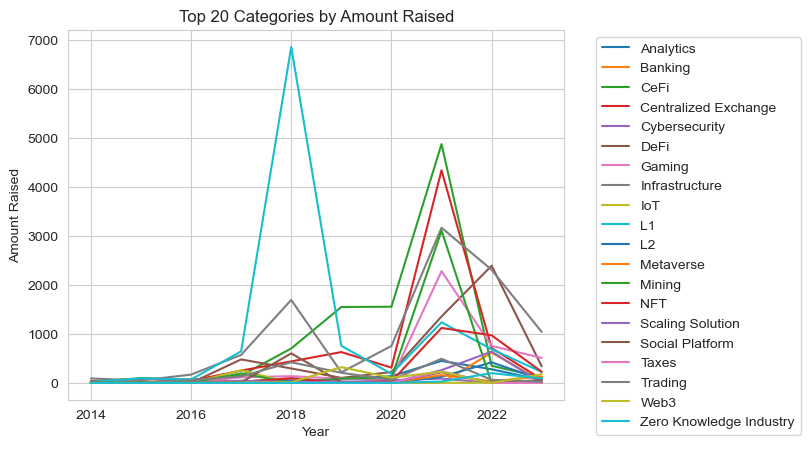

In [162]:
for i in pivot_table.columns:
    if i in top_20_cat.index:
        sns.lineplot(data=pivot_table[i], label=i)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 20 Categories by Amount Raised')
plt.ylabel('Amount Raised')
plt.xlabel('Year')
plt.show()

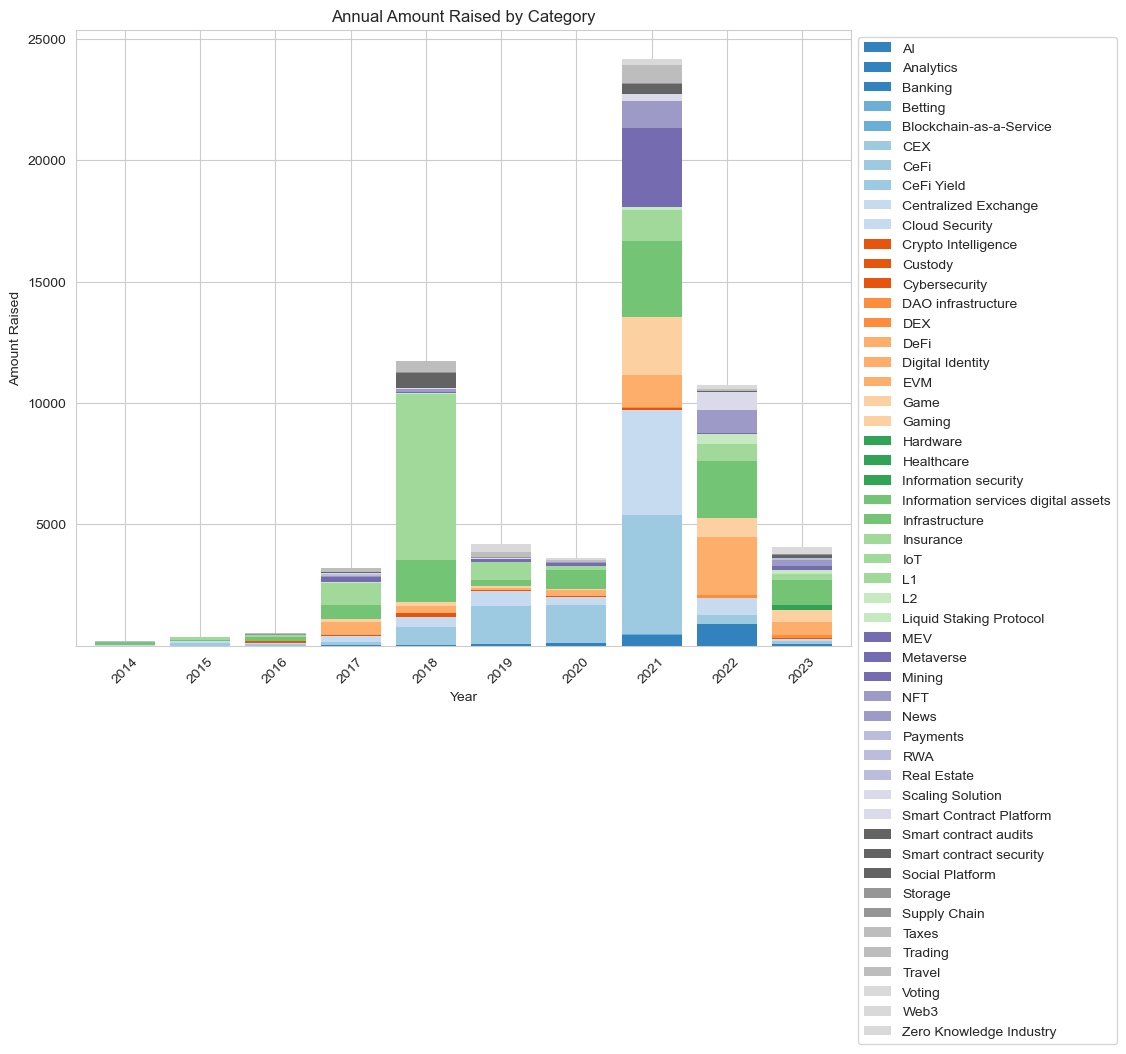

In [163]:
pivot_table.plot(kind='bar', 
                 stacked=True, 
                 figsize=(10, 8),
                 colormap='tab20c',
                 width=0.8,
                 edgecolor='none')
plt.xticks(rotation=45)
plt.title('Annual Amount Raised by Category')
plt.xlabel('Year')
plt.ylabel('Amount Raised')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Axes: xlabel='Category', ylabel='Year'>

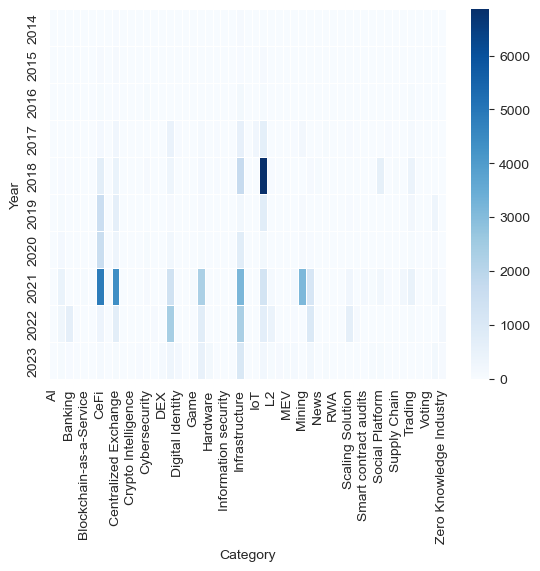

In [215]:
sns.heatmap(pivot_table, 
            cmap='Blues', 
            annot=False, 
            fmt='.0f', 
            linewidths=0.5, 
            linecolor='white'
            )


# Rank of Investors to lead the rounds 

In [187]:
lead_investors = df.loc[~df['Lead Investor'].isna()]

In [188]:
lead_investors['Lead Investor'] = lead_investors['Lead Investor'].apply(lambda x: x.lower() if isinstance(x, str) else x)
lead_investors['Lead Investor'] = lead_investors['Lead Investor'].str.replace(' ','')

/var/folders/sg/1c3btq_91ps4pmk0y0809zmw0000gn/T/ipykernel_4266/633312671.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [191]:
top_lead_investors = lead_investors['Lead Investor'].str.split('+', expand=True).stack().value_counts().head(20)
top_lead_df = pd.DataFrame(top_lead_investors).reset_index()
top_lead_df.columns = ['Investor', 'Count']

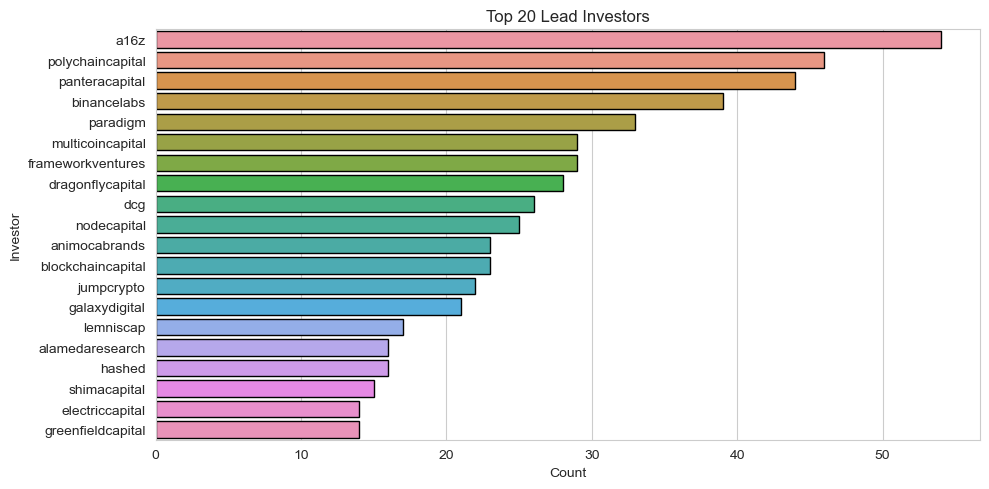

In [213]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(data=top_lead_df,
            x='Count',
            y='Investor',
            # palette='Blues_d',
            )
for patch in ax.patches:
    patch.set_edgecolor('black')

plt.title('Top 20 Lead Investors')
plt.tight_layout()
plt.show()

In [218]:
df.loc[df['Other Investors'].str.contains('Alameda', na=False)]

,Name,Date,Amount Raised,Round,Description,Lead Investor,Category,Valuation,Chains,Other Investors
705,Fordefi,2022-11-08,18.00,seed,NaN,Lightspeed Ventures,NaN,NaN,NaN,Electric Capital + Alameda Research + Jump Cry...
736,Kollider,2022-10-26,2.40,seed,NaN,Lemniscap,NaN,NaN,Bitcoin,Castle Island Ventures + Polychain Capital + A...
886,Fuel Labs,2022-09-06,80.00,unknown,Modular Execution Layer,Blockchain Capital + Stratos,NaN,NaN,NaN,Alameda Research + CoinFund + Bain Capital Cry...
932,Jito Labs,2022-08-12,10.00,series,MEV,Multicoin Capital + Framework Ventures,NaN,NaN,NaN,Alameda Research + Solana Ventures + Delphi Di...
1182,Taki,2022-04-08,3.45,seed,Social network,SuperLayer,NaN,NaN,NaN,Alameda Research + Coinbase Ventures + Coin DC...
...,...,...,...,...,...,...,...,...,...,...
2774,Covalent,2020-10-07,3.10,unknown,Covalent is designed to address a problem that...,NaN,Infrastructure,NaN,NaN,1kx + Alameda Research + AU21 Capital + CoinGe...
2794,Dune Analytics,2020-09-23,2.00,seed,Dune Analytics is an Ethereum-centric analytic...,NaN,Analytics,NaN,NaN,Alameda Research + Anthony Sassano + Calvin Li...
2828,Oin Finance,2020-08-25,1.00,public round,Oin Finance is a Defi company building liquidi...,NaN,DeFi,NaN,Near,Alameda Research + BlockWater Management + CMS...
2835,Sifchain Finance,2020-08-15,3.50,seed,Sifchain is the world's first omni-chain decen...,NaN,DeFi,NaN,Cosmos,Alameda Research + AU21 Capital + Bitscale Cap...
